**Objective**-You are required to model the price of cars with the available independent variables. It will be used by the
management to understand how exactly the prices vary with the independent variables. They can accordingly
manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will
be a good way for the management to understand the pricing dynamics of a new market.

**Importing the Libraries that I am going use in this project**

In [0]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


**Reading the available dataset for analysis**



In [0]:
data=pd.read_csv("CarPrice_Assignment.csv")

In [0]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


**Computing a summary of statistics pertaining to the DataFrame columns.**

In [0]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


**Concise summary of the dataframe.**

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

**Fetching pairwise correlation of all columns in the dataframe.**

In [0]:
data.corr(method='pearson')

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


**Visualising correlation through heatmap**

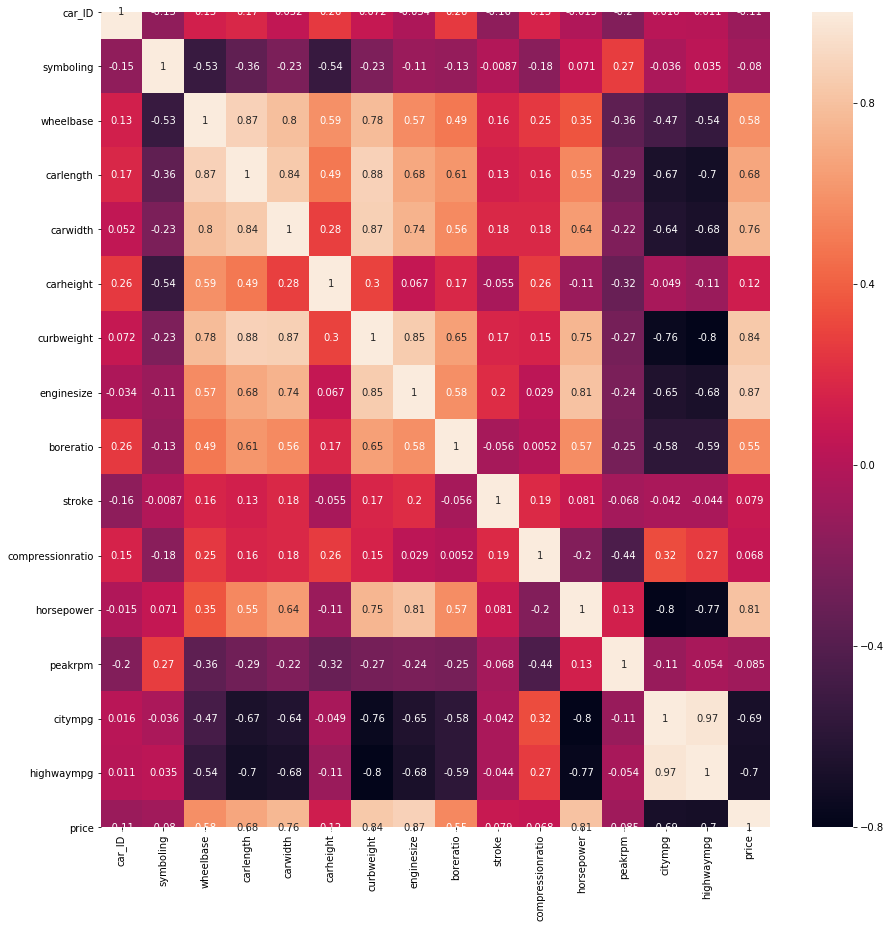

In [0]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)

**Cleaning the Data**

*Splitting the name of car from its company name in to a new column*

In [0]:
new = data["CarName"].str.split(" ", n=1, expand = True) 
  
# making separate first name column from new data frame 
data["CarName"]= new[0] 
  
# making separate last name column from new data frame
  
# Dropping old Name columns
  
# making separate first name column from new data frame 
data["Car Name"]= new[0] 
   
  
# Dropping old Name columns 
data.drop(columns =["CarName"], inplace = True)

data.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Car Name
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


*Dropping the variables or parameters which has correlation less than .4 in comparison with the price of car*

In [0]:
df=data.drop(["car_ID","symboling","carheight","stroke","compressionratio","peakrpm","citympg","highwaympg"],axis=1)

In [0]:
df.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,price
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,13495.0
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,16500.0
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,16500.0
3,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,13950.0
4,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,17450.0


*Encoding the columns in integer values which are in String or Text *

In [0]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
label.fit(data["CarName"])

LabelEncoder()

In [0]:
label.transform(data["CarName"])
df["CarName"]=label.transform(data["CarName"])

label.fit(data["fueltype"])
label.transform(data["fueltype"])
df["fueltype"]=label.transform(data["fueltype"])

label.fit(data["aspiration"])
label.transform(data["aspiration"])
df["aspiration"]=label.transform(data["aspiration"])


label.fit(data["doornumber"])
label.transform(data["doornumber"])
df["doornumber"]=label.transform(data["doornumber"])

label.fit(data["carbody"])
label.transform(data["carbody"])
df["carbody"]=label.transform(data["carbody"])

label.fit(data["drivewheel"])
label.transform(data["drivewheel"])
df["drivewheel"]=label.transform(data["drivewheel"])

label.fit(data["enginelocation"])
label.transform(data["enginelocation"])
df["enginelocation"]=label.transform(data["enginelocation"])


label.fit(data["cylindernumber"])
label.transform(data["cylindernumber"])
df["cylindernumber"]=label.transform(data["cylindernumber"])

label.fit(data["enginetype"])
label.transform(data["enginetype"])
df["enginetype"]=label.transform(data["enginetype"])

label.fit(data["fuelsystem"])
label.transform(data["fuelsystem"])
df["fuelsystem"]=label.transform(data["fuelsystem"])








*Now fetching the whole dataset with the newly Encoded parameters*

In [0]:
df.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,price
0,2,1,0,1,0,2,0,88.6,168.8,64.1,2548,0,2,130,5,3.47,111,13495.0
1,3,1,0,1,0,2,0,88.6,168.8,64.1,2548,0,2,130,5,3.47,111,16500.0
2,1,1,0,1,2,2,0,94.5,171.2,65.5,2823,5,3,152,5,2.68,154,16500.0
3,4,1,0,0,3,1,0,99.8,176.6,66.2,2337,3,2,109,5,3.19,102,13950.0
4,5,1,0,0,3,0,0,99.4,176.6,66.4,2824,3,1,136,5,3.19,115,17450.0


*After Encoding the paramenters(which were in text values) , Now fetching the correlation with every other parameters*

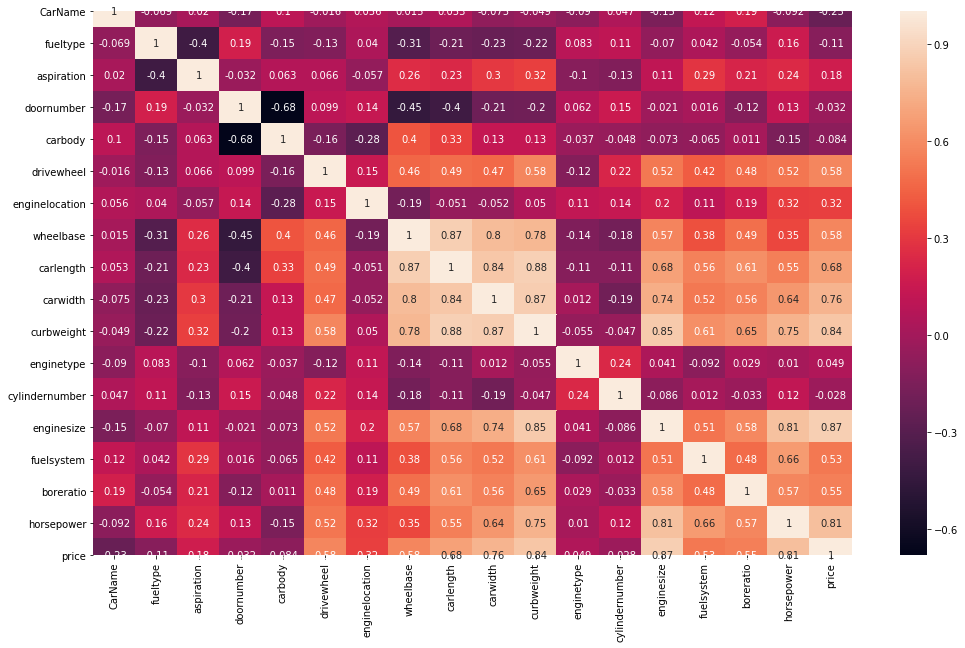

In [0]:
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(),annot=True)

In [0]:
df.corr()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,price
CarName,1.000000,-0.069435,0.019914,-0.171745,0.099691,-0.016129,0.055968,0.014550,0.053016,-0.075349,-0.049407,-0.090381,0.047154,-0.153982,0.123845,0.188598,-0.092131,-0.231439
fueltype,-0.069435,1.000000,-0.401397,0.191491,-0.147853,-0.132257,0.040070,-0.308346,-0.212679,-0.233880,-0.217275,0.082695,0.110617,-0.069594,0.041529,-0.054451,0.163926,-0.105679
aspiration,0.019914,-0.401397,1.000000,-0.031792,0.063028,0.066465,-0.057191,0.257611,0.234539,0.300567,0.324902,-0.102963,-0.133119,0.108217,0.288086,0.212614,0.241685,0.177926
doornumber,-0.171745,0.191491,-0.031792,1.000000,-0.680358,0.098954,0.137757,-0.447357,-0.398568,-0.207168,-0.197379,0.062431,0.154322,-0.020742,0.015519,-0.119258,0.126947,-0.031835
carbody,0.099691,-0.147853,0.063028,-0.680358,1.000000,-0.155745,-0.277009,0.401362,0.334433,0.131710,0.128467,-0.037024,-0.048408,-0.073352,-0.065079,0.010549,-0.153928,-0.083976
drivewheel,-0.016129,-0.132257,0.066465,0.098954,-0.155745,1.000000,0.147865,0.459745,0.485649,0.470751,0.575111,-0.116823,0.223238,0.524307,0.424686,0.481827,0.518686,0.577992
enginelocation,0.055968,0.040070,-0.057191,0.137757,-0.277009,0.147865,1.000000,-0.187790,-0.050989,-0.051698,0.050468,0.114127,0.135541,0.196826,0.105971,0.185042,0.317839,0.324973
wheelbase,0.014550,-0.308346,0.257611,-0.447357,0.401362,0.459745,-0.187790,1.000000,0.874587,0.795144,0.776386,-0.135577,-0.184596,0.569329,0.384601,0.488750,0.353294,0.577816
carlength,0.053016,-0.212679,0.234539,-0.398568,0.334433,0.485649,-0.050989,0.874587,1.000000,0.841118,0.877728,-0.113291,-0.109585,0.683360,0.557810,0.606454,0.552623,0.682920
carwidth,-0.075349,-0.233880,0.300567,-0.207168,0.131710,0.470751,-0.051698,0.795144,0.841118,1.000000,0.867032,0.012298,-0.194074,0.735433,0.521434,0.559150,0.640732,0.759325


*Dropping the newly encoded parameters which has correlation less than .4 with respect to the price*

In [0]:
df1=df.drop(["fueltype","aspiration","doornumber","carbody","enginetype","CarName","cylindernumber","enginelocation"],axis=1)
df1.head()

,drivewheel,wheelbase,carlength,carwidth,curbweight,enginesize,fuelsystem,boreratio,horsepower,price
0,2,88.6,168.8,64.1,2548,130,5,3.47,111,13495.0
1,2,88.6,168.8,64.1,2548,130,5,3.47,111,16500.0
2,2,94.5,171.2,65.5,2823,152,5,2.68,154,16500.0
3,1,99.8,176.6,66.2,2337,109,5,3.19,102,13950.0
4,0,99.4,176.6,66.4,2824,136,5,3.19,115,17450.0


***Now After Removing all the unwanted Factors affecting the Price of cars , we'll again view the correlation just to be free from any error.***

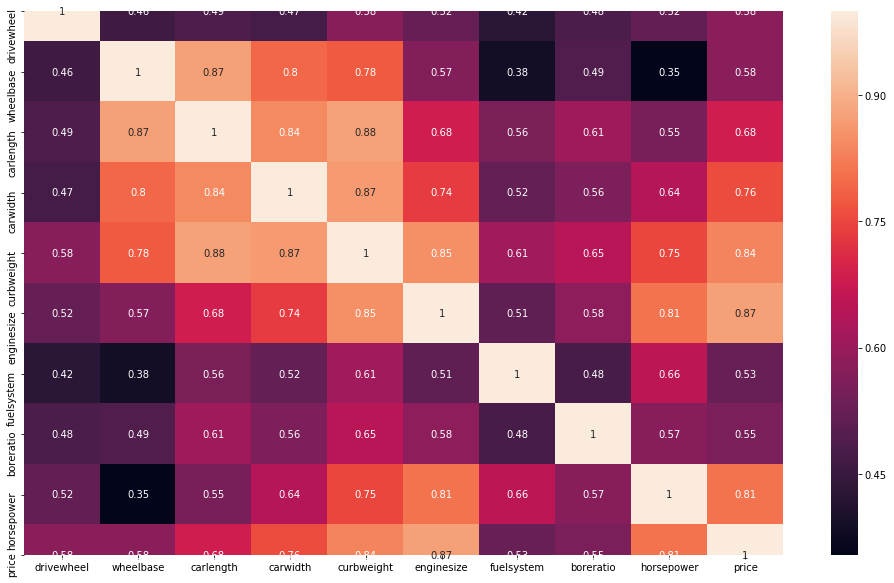

In [0]:

plt.figure(figsize=(17,10))
sns.heatmap(df1.corr(),annot=True)

In [0]:
df1.corr()

,drivewheel,wheelbase,carlength,carwidth,curbweight,enginesize,fuelsystem,boreratio,horsepower,price
drivewheel,1.000000,0.459745,0.485649,0.470751,0.575111,0.524307,0.424686,0.481827,0.518686,0.577992
wheelbase,0.459745,1.000000,0.874587,0.795144,0.776386,0.569329,0.384601,0.488750,0.353294,0.577816
carlength,0.485649,0.874587,1.000000,0.841118,0.877728,0.683360,0.557810,0.606454,0.552623,0.682920
carwidth,0.470751,0.795144,0.841118,1.000000,0.867032,0.735433,0.521434,0.559150,0.640732,0.759325
curbweight,0.575111,0.776386,0.877728,0.867032,1.000000,0.850594,0.611642,0.648480,0.750739,0.835305
enginesize,0.524307,0.569329,0.683360,0.735433,0.850594,1.000000,0.514070,0.583774,0.809769,0.874145
fuelsystem,0.424686,0.384601,0.557810,0.521434,0.611642,0.514070,1.000000,0.475599,0.655638,0.526823
boreratio,0.481827,0.488750,0.606454,0.559150,0.648480,0.583774,0.475599,1.000000,0.573677,0.553173
horsepower,0.518686,0.353294,0.552623,0.640732,0.750739,0.809769,0.655638,0.573677,1.000000,0.808139
price,0.577992,0.577816,0.682920,0.759325,0.835305,0.874145,0.526823,0.553173,0.808139,1.000000


***Assigning one variable to all the factors affecting price i.e. X and Y to the Price of Car***

In [0]:
y=df1["price"]
x=df1.drop(["price"],axis=1)

***Importing Library to train and build the model for the Analysis***

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=1/3)

In [0]:
from sklearn.linear_model import LinearRegression
p = LinearRegression()

l=p.fit(X_train,Y_train)

# Predicting the Test set results
y_pred = p.predict(X_test)

***From the Model Created in above Cell , Fetching the prediction of the Price of car***

In [0]:
y_pred

array([25521.58393682, 16398.58898632, 18446.1455465 , 22366.90655031,
       11125.80486793, 10580.32963622, 12912.99128937,  5874.78303939,
       10145.59383857, 10759.29012989, 17821.71834198,  6083.74259073,
       24958.29056793, 10066.51514912, 10490.56182131, 21472.23874842,
        6423.38205129, 14751.98351465,  7267.11025004, 25521.58393682,
        7232.00898831,  9016.65727438, 10155.63389252,  6192.21433708,
       17949.16526339, 14774.3610356 ,  5845.04701307, 13931.20024832,
       11476.46937985, 24500.87393743, 11176.29845285, 12557.12277364,
        7009.05605037,  7353.43666171, 24764.68695753, 17961.89651245,
       10787.23727897,  9065.16902006,  8679.93390939,  8614.08196173,
       15373.04185526, 18101.80582125,  -682.43161197, 39628.12616253,
        6361.931007  , 16126.14025648,  6743.528162  , 25756.47935778,
       18068.16286726, 16480.6605233 ,  8086.48711463, 13769.74362447,
        6758.61035274,  9081.81070334, 11387.041042  , 17519.88101142,
      

In [0]:
data2=pd.DataFrame(Y_test)

In [0]:
data2["prediction"]=y_pred

In [0]:
data2

,0,prediction
0,32528.0,25521.583937
1,16515.0,16398.588986
2,18420.0,18446.145546
3,15690.0,22366.906550
4,11248.0,11125.804868
...,...,...
64,5572.0,5999.845427
65,21485.0,21534.856144
66,19699.0,27382.923988
67,7957.0,8040.604147


**Calculating and then showing the difference of the actual and predicted Dataset in a DataFrame**

In [0]:
data2["difference"]=data2[0]-data2["prediction"]

In [0]:
data2.head()

,0,prediction,difference
0,32528.0,25521.583937,7006.416063
1,16515.0,16398.588986,116.411014
2,18420.0,18446.145546,-26.145546
3,15690.0,22366.906550,-6676.906550
4,11248.0,11125.804868,122.195132


***Calculating the Accuracy of the model***

In [0]:
p.score(X_test,Y_test)*100

77.05754387780944

**Conclusion**

With the above Analysis and model,this model of mine can be used predict the price of car with given factors.And with the accuracy rate of 77% the predicted value will be accurate every 3 out of 4 times.

